# Titanic Dataset Analysis - Part 2

Part 2 of the analysis examines the data using correlation, linear regression models, and decision trees.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

%matplotlib inline

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
titanic_df['Age'] = titanic_df.groupby('Survived')['Age'].transform(lambda x: x.fillna(x.mean()))
titanic_df.isnull().sum() #check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Correlation and Linear Regression

In [2]:
# correlation
titanic_df['Age'].corr(titanic_df['Survived'])

-0.085363872416497691

The correlation is weak and negative.

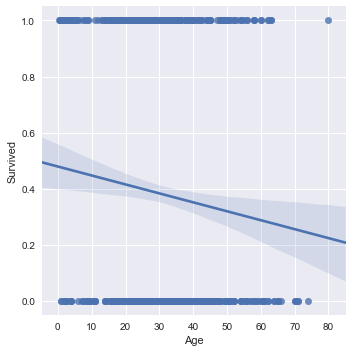

In [3]:
# linear regression
sns.lmplot(x="Age", y="Survived", data=titanic_df)

The linear regression line confirms a slight negative relationship.

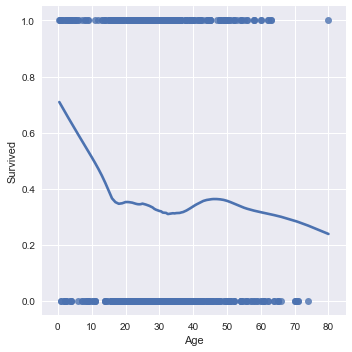

In [4]:
# lowess curve
sns.lmplot(x="Age", y="Survived", data=titanic_df, lowess=True)

From the lowess curve, we can see that the line has three different slopes for ages 0-18, 18-45, and 45-80 approximately. In part 1, the survivors were cross-tabluated against binned ages that where the boundaries were guessed. This graph is a better way to see where those boundaries are.

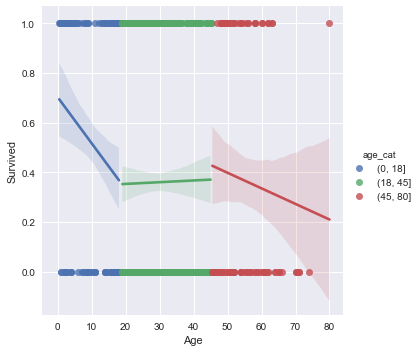

In [5]:
titanic_df['age_cat'] = pd.cut(titanic_df['Age'], bins=[0, 18, 45, 80])
sns.lmplot(x="Age", y="Survived", hue="age_cat", data=titanic_df, 
           truncate=True)

The 'Age' is cut into three categories. Then, create and plot the linear models for each category.

## Decision Tree

In [6]:
# Code 'Sex' as dummy variable
titanic_df['Male'] = pd.get_dummies(titanic_df['Sex'], drop_first = True)

# set up the model and run it
features = ['Pclass', 'Male', 'Age', 'SibSp', 'Parch', 'Fare']
classes = ['0', '1']
X = titanic_df[features]
y = titanic_df['Survived']

clf = DecisionTreeClassifier(min_samples_split=20, max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

To make it easier to view in this notebook, the max_depth is set to 3. The max depth should be adjusted to balance accuracy versus overfitting.

In [7]:
# Check the performance on the training data
clf.score(X, y)

0.83501683501683499

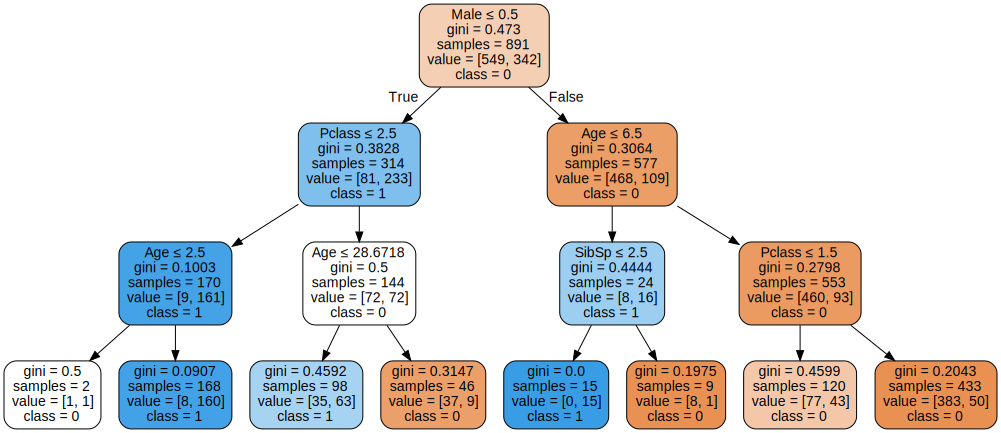

In [8]:
# Visualize the tree
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=classes,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

Here is an exmaple of how to read one branch of the decision tree. The root starts with whether the person is female (Male <= 0.5). If female, check the passenger class, if the passenger class is 1 or 2 (Pclass <= 2.5) and the age is less than or equal to 2.5 the person did not survive. It the age was greater, she survived.